In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json

def read_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    return data

test_path = '/content/drive/MyDrive/task1/data/araieval24_task1_test.jsonl'
# Change this to your actual file path
train_path = '/content/drive/MyDrive/task1/data/araieval24_task1_train.jsonl'
val_path='/content/drive/MyDrive/task1/data/araieval24_task1_dev.jsonl'
train_json = read_jsonl(train_path)
test_json = read_jsonl(test_path)
val_json=read_jsonl(val_path)

In [4]:
train_size = len(train_json)
val_size=len(val_json)
test_size = len(test_json)

In [5]:
print(f"Train file size: {train_size} items")
print(f"Val file size: {val_size} items")
print(f"Test file size: {test_size} items")


Train file size: 6997 items
Val file size: 921 items
Test file size: 1046 items


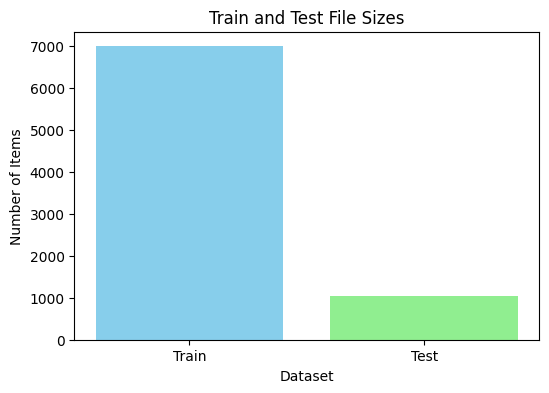

In [20]:
import matplotlib.pyplot as plt

# Sizes of train and test files
sizes = [len(train_json), len(test_json)]
labels = ['Train', 'Test']

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color=['skyblue', 'lightgreen'])
plt.xlabel('Dataset')
plt.ylabel('Number of Items')
plt.title('Train and Test File Sizes')
plt.show()


In [7]:
def count_techniques(data):
    technique_count = {}
    for tweet in data:
        labels = tweet['labels']
        for label in labels:
            technique = label['technique']
            technique_count[technique] = technique_count.get(technique, 0) + 1
    return technique_count

train_technique_count = count_techniques(train_json)

# Print the counts for each technique
for technique, count in train_technique_count.items():
    print(f"{technique}: {count}")


Appeal_to_Fear-Prejudice: 180
Loaded_Language: 8779
Name_Calling-Labeling: 2243
Questioning_the_Reputation: 872
Exaggeration-Minimisation: 1077
Appeal_to_Values: 116
Flag_Waving: 218
Doubt: 293
Obfuscation-Vagueness-Confusion: 578
Slogans: 190
Appeal_to_Authority: 218
Repetition: 144
Causal_Oversimplification: 310
False_Dilemma-No_Choice: 74
Whataboutism: 26
Conversation_Killer: 69
Straw_Man: 23
Appeal_to_Hypocrisy: 108
Appeal_to_Popularity: 46
Guilt_by_Association: 23
Red_Herring: 41
Appeal_to_Time: 54
Consequential_Oversimplification: 83


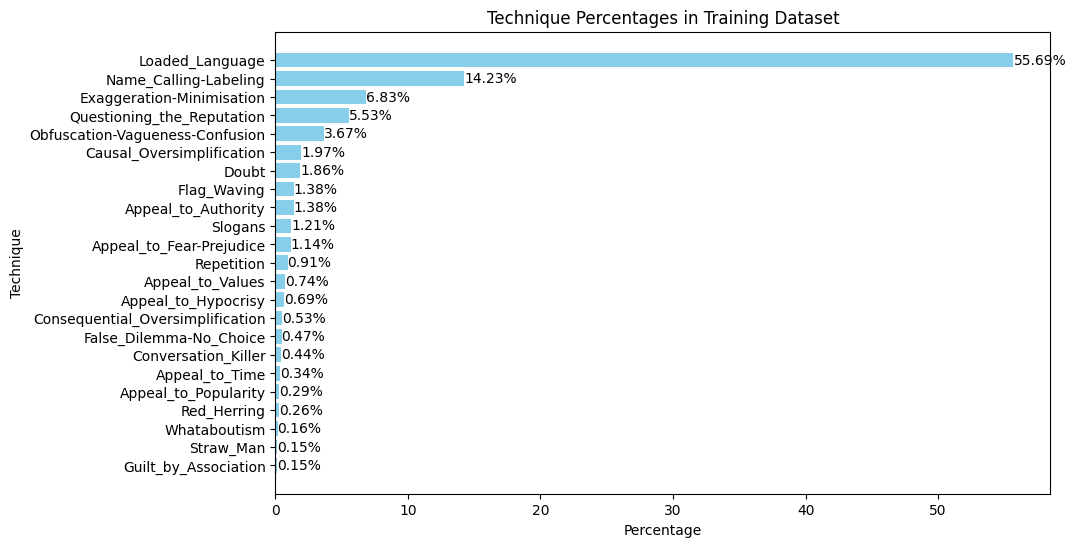

In [8]:
import matplotlib.pyplot as plt

# Sort the technique counts by value in descending order
sorted_counts = sorted(train_technique_count.items(), key=lambda x: x[1], reverse=True)

# Extract technique names and counts
techniques = [item[0] for item in sorted_counts]
counts = [item[1] for item in sorted_counts]

# Calculate percentages
total_samples = sum(counts)
percentages = [(count / total_samples) * 100 for count in counts]

# Create a bar chart with percentages displayed on each bar
plt.figure(figsize=(10, 6))
bars = plt.barh(techniques, percentages, color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Technique')
plt.title('Technique Percentages in Training Dataset')
plt.gca().invert_yaxis()  # Invert y-axis to display techniques in descending order

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%',
             va='center', ha='left')

plt.savefig('Technique Percentages.png')
plt.show()


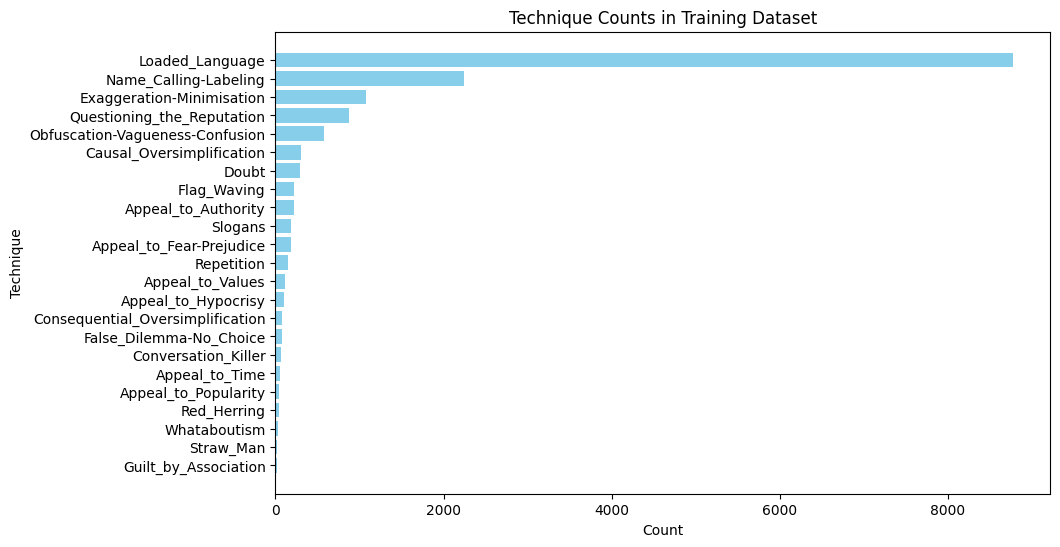

In [8]:
import matplotlib.pyplot as plt

# Sort the technique counts by value in descending order
sorted_counts = sorted(train_technique_count.items(), key=lambda x: x[1], reverse=True)

# Extract technique names and counts
techniques = [item[0] for item in sorted_counts]
counts = [item[1] for item in sorted_counts]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(techniques, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Technique')
plt.title('Technique Counts in Training Dataset')
plt.gca().invert_yaxis()  # Invert y-axis to display techniques in descending order
plt.savefig('Technique Counts.png')

In [9]:
def count_types(data):
    type_count = {}
    for tweet in data:
        tweet_type = tweet['type']
        type_count[tweet_type] = type_count.get(tweet_type, 0) + 1
    return type_count

train_type_count = count_types(train_json)

# Print the counts for each type
for tweet_type, count in train_type_count.items():
    print(f"{tweet_type}: {count}")

tweet: 995
paragraph: 6002


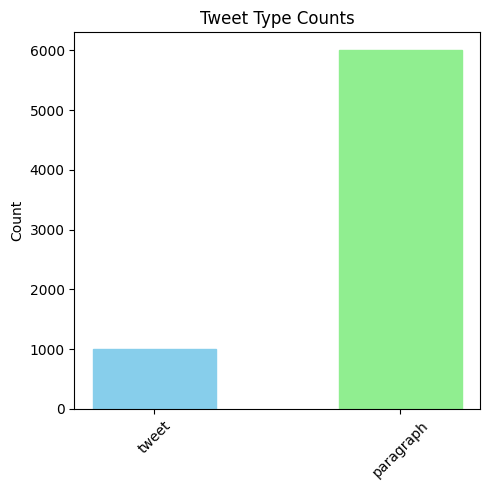

In [16]:
import matplotlib.pyplot as plt

def count_types(data):
    type_count = {}
    for tweet in data:
        tweet_type = tweet['type']
        type_count[tweet_type] = type_count.get(tweet_type, 0) + 1
    return type_count

train_type_count = count_types(train_json)

# Extract type names and counts
types = list(train_type_count.keys())
counts = list(train_type_count.values())

# Define colors for each type
colors = ['skyblue', 'lightgreen']  # Add more colors if there are more types

# Create a bar chart
plt.figure(figsize=(5, 5))
bars = plt.bar(types, counts, color=colors, width=0.5)
#plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Tweet Type Counts')

# Apply different color to each bar
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [4]:
propaganda_techniques = ['Appeal_to_Values', 'Loaded_Language', 'Consequential_Oversimplification',
                         'Causal_Oversimplification', 'Questioning_the_Reputation', 'Straw_Man', 'Repetition',
                         'Guilt_by_Association', 'Appeal_to_Hypocrisy', 'Conversation_Killer',
                         'False_Dilemma-No_Choice', 'Whataboutism', 'Slogans',
                         'Obfuscation-Vagueness-Confusion',
                         'Name_Calling-Labeling', 'Flag_Waving', 'Doubt',
                         'Appeal_to_Fear-Prejudice', 'Exaggeration-Minimisation', 'Red_Herring',
                         'Appeal_to_Popularity', 'Appeal_to_Authority', 'Appeal_to_Time']

# Create a dictionary to hold label to id mapping
label_to_id = {'O': 0}  # 'O' stands for "Outside" any tagged segment

next_id = 1
for technique in propaganda_techniques:
    label_to_id[technique] = next_id
    next_id += 1
print(label_to_id)
# Reverse the label-to-ID mapping to create ID-to-label mapping
id_to_label = {v: k for k, v in label_to_id.items()}
print(id_to_label)

{'O': 0, 'Appeal_to_Values': 1, 'Loaded_Language': 2, 'Consequential_Oversimplification': 3, 'Causal_Oversimplification': 4, 'Questioning_the_Reputation': 5, 'Straw_Man': 6, 'Repetition': 7, 'Guilt_by_Association': 8, 'Appeal_to_Hypocrisy': 9, 'Conversation_Killer': 10, 'False_Dilemma-No_Choice': 11, 'Whataboutism': 12, 'Slogans': 13, 'Obfuscation-Vagueness-Confusion': 14, 'Name_Calling-Labeling': 15, 'Flag_Waving': 16, 'Doubt': 17, 'Appeal_to_Fear-Prejudice': 18, 'Exaggeration-Minimisation': 19, 'Red_Herring': 20, 'Appeal_to_Popularity': 21, 'Appeal_to_Authority': 22, 'Appeal_to_Time': 23}
{0: 'O', 1: 'Appeal_to_Values', 2: 'Loaded_Language', 3: 'Consequential_Oversimplification', 4: 'Causal_Oversimplification', 5: 'Questioning_the_Reputation', 6: 'Straw_Man', 7: 'Repetition', 8: 'Guilt_by_Association', 9: 'Appeal_to_Hypocrisy', 10: 'Conversation_Killer', 11: 'False_Dilemma-No_Choice', 12: 'Whataboutism', 13: 'Slogans', 14: 'Obfuscation-Vagueness-Confusion', 15: 'Name_Calling-Labeling

In [5]:
def create_bio_tags(text, labels, tokenizer):
    # Tokenize text and create mappings from tokens to their character positions
    encoded = tokenizer.encode_plus(text, return_offsets_mapping=True, add_special_tokens=True)
    tokens = tokenizer.convert_ids_to_tokens(encoded['input_ids'])
    offset_mapping = encoded['offset_mapping']

    # Initialize token tags as 'O'
    token_tags = ['O'] * len(tokens)
    # print(text)
    # Assign B-I tags based on the offset mapping and labels
    for label in labels:
        label_start = label['start']+1
        label_end = label['end']-1   # Adjust to be inclusive
        label_type = label['technique']

        # Find the first and last token covered by this label
        in_entity = False
        for i, (start, end) in enumerate(offset_mapping):
            if start > label_end:
                break
            if end < label_start:
                continue

            if start == label_start or (not in_entity and start < label_end):
                token_tags[i] = f"{label_type}"
                in_entity = True
            elif in_entity and start <= label_end:
                token_tags[i] = f"{label_type}"

        # Reset for next label
        in_entity = False

    return tokens, token_tags

In [6]:
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer
from torch.nn.utils.rnn import pad_sequence
import torch

class PropagandaDataset(Dataset):
    def __init__(self, entries, tokenizer, label_to_id, max_length=128):
        self.entries = entries
        self.tokenizer = tokenizer
        self.label_to_id = label_to_id
        self.max_length = max_length

    def __len__(self):
        return len(self.entries)

    def __getitem__(self, idx):
        entry = self.entries[idx]
        text = entry['text']
        labels = entry['labels']
        id = entry["id"]
        tokens, bio_tags = create_bio_tags(text, labels, self.tokenizer)
        token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
        label_ids = [self.label_to_id.get(tag, self.label_to_id['O']) for tag in bio_tags]
        words = [self.tokenizer.decode(token) for token in token_ids]
        token_ids = token_ids[:self.max_length]
        label_ids = label_ids[:self.max_length]

        return {
            "id" : id,
            "text": entry['text'],
            "words": words,
            'input_ids': torch.tensor(token_ids, dtype=torch.long),
            'labels': torch.tensor(label_ids, dtype=torch.long),
            'attention_mask': torch.tensor([1]*len(token_ids), dtype=torch.long)
        }

def create_data_loader(dataset, batch_size=16):
    def collate_fn(batch):
        input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True, padding_value=0)
        labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)
        attention_mask = pad_sequence([item['attention_mask'] for item in batch], batch_first=True, padding_value=0)
        id = [item['id'] for item in batch]
        text = [item['text'] for item in batch]
        words = [item['words'] for item in batch]
        return {
            'id': id,
            'text': text,
            "words": words,
            'input_ids': input_ids,
            'labels': labels,
            'attention_mask': attention_mask
        }

    return DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn)


# Load the AraBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")
train_data = PropagandaDataset(train_json, tokenizer, label_to_id)
test_data = PropagandaDataset(test_json, tokenizer, label_to_id)
train_dataset = create_data_loader(train_data, batch_size=32)
val_dataset = create_data_loader(test_data, batch_size=32)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [7]:
from transformers import AutoModelForTokenClassification, AutoConfig

def initialize_model(model_name, label_to_id):
    config = AutoConfig.from_pretrained(model_name, num_labels=len(label_to_id))
    model = AutoModelForTokenClassification.from_pretrained(model_name, config=config)
    return model

model_name = "aubmindlab/bert-base-arabertv2"
model = initialize_model(model_name, label_to_id)

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
import torch
from torch.optim import AdamW
from torch.utils.data import DataLoader
import torch.nn as nn
import tqdm

# # Assuming you have a dataset and a dataloader
# train_dataset = PropagandaDataset(data_samples, tokenizer, label_to_id, max_length=128)
train_dataset = PropagandaDataset(train_json, tokenizer, label_to_id)
test_dataset = PropagandaDataset(test_json, tokenizer, label_to_id)
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# train_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
train_loader = create_data_loader(train_dataset, batch_size=32)
val_loader = create_data_loader(test_dataset, batch_size=32)


# Prepare optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# # Set the model in training mode
# model.train()

# Loss function
loss_fn = nn.CrossEntropyLoss(ignore_index=-100)

def run_epoch(dataloader, is_training):
    if is_training:
        model.train()
    else:
        model.eval()

    total_loss = 0
    total_correct = 0
    total_elements = 0
    pbar = tqdm.tqdm(dataloader)
    pbar.set_description("Training Epoch_")
    for batch_idx, batch in enumerate(pbar):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with torch.set_grad_enabled(is_training):
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            if is_training:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        total_loss += loss.item()

        # Calculate the accuracy
        predictions = outputs.logits.argmax(-1)
        mask = labels != -100
        correct = (predictions == labels) * mask
        total_correct += correct.sum().item()
        total_elements += mask.sum().item()
    # result = compute_metrics((predictions.detach().cpu().numpy() , labels.detach().cpu().numpy()))
    average_loss = total_loss / len(dataloader)
    accuracy = total_correct / total_elements
    return average_loss, accuracy


In [ ]:
# Training and validation loop
num_epochs = 10
best_val = 0
for epoch in range(num_epochs):
    train_loss, train_accuracy = run_epoch(train_loader, is_training=True)
    val_loss, val_accuracy = run_epoch(val_loader, is_training=False)
    if val_accuracy> best_val:
        best_val = val_accuracy
        best_model_weights = model.state_dict()
        torch.save(best_model_weights, f'text_model_weights.pth')
        print("best_weights_save")
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Training loss: {train_loss:.4f}, accuracy: {train_accuracy:.4f}")
    print(f"Validation loss: {val_loss:.4f}, accuracy: {val_accuracy:.4f}")

Training Epoch_: 100%|██████████| 29/29 [00:06<00:00,  4.35it/s]


best_weights_save
Epoch 1/10
Training loss: 1.0180, accuracy: 0.7773
Validation loss: 1.0928, accuracy: 0.7555


Training Epoch_: 100%|██████████| 29/29 [00:06<00:00,  4.20it/s]


Epoch 2/10
Training loss: 0.9009, accuracy: 0.7832
Validation loss: 1.0840, accuracy: 0.7529


Training Epoch_: 100%|██████████| 29/29 [00:06<00:00,  4.14it/s]


Epoch 3/10
Training loss: 0.7974, accuracy: 0.7948
Validation loss: 1.0756, accuracy: 0.7420


Training Epoch_: 100%|██████████| 29/29 [00:06<00:00,  4.18it/s]


Epoch 4/10
Training loss: 0.8100, accuracy: 0.7959
Validation loss: 1.2024, accuracy: 0.7011


Training Epoch_: 100%|██████████| 29/29 [00:06<00:00,  4.33it/s]


Epoch 5/10
Training loss: 0.6564, accuracy: 0.8219
Validation loss: 1.1728, accuracy: 0.6837


Training Epoch_: 100%|██████████| 29/29 [00:06<00:00,  4.31it/s]


Epoch 6/10
Training loss: 0.5575, accuracy: 0.8434
Validation loss: 1.1760, accuracy: 0.7154


Training Epoch_: 100%|██████████| 29/29 [00:06<00:00,  4.18it/s]


best_weights_save
Epoch 7/10
Training loss: 0.4843, accuracy: 0.8615
Validation loss: 1.2493, accuracy: 0.7572


Training Epoch_: 100%|██████████| 29/29 [00:06<00:00,  4.22it/s]


best_weights_save
Epoch 8/10
Training loss: 0.4405, accuracy: 0.8728
Validation loss: 1.3069, accuracy: 0.7637


Training Epoch_: 100%|██████████| 29/29 [00:06<00:00,  4.27it/s]


Epoch 9/10
Training loss: 0.4116, accuracy: 0.8794
Validation loss: 1.3291, accuracy: 0.7549


Training Epoch_: 100%|██████████| 29/29 [00:06<00:00,  4.16it/s]


Epoch 10/10
Training loss: 0.3324, accuracy: 0.9017
Validation loss: 1.3013, accuracy: 0.7412


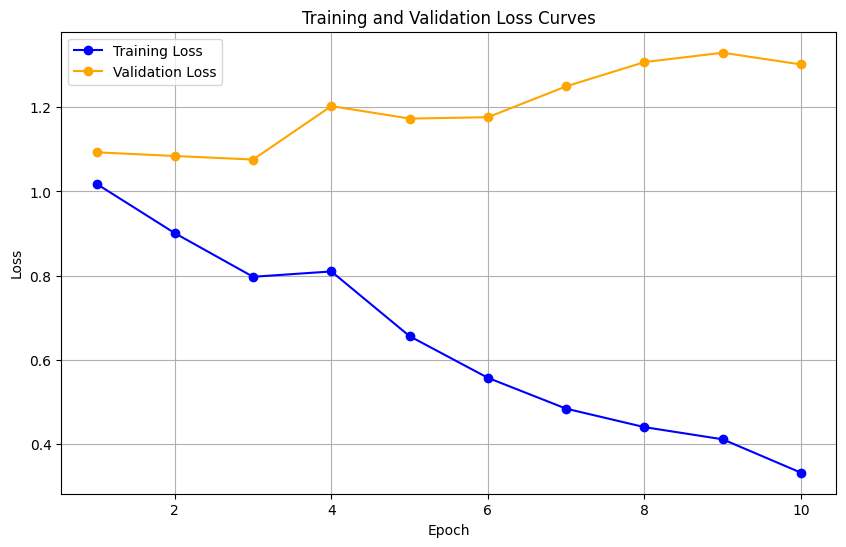

In [12]:
import matplotlib.pyplot as plt

# Training and validation loop
num_epochs = 10
best_val = 0
train_losses = []
val_losses = []
train_accuracy_list = []  # Use a different variable name for accuracy list
val_accuracy_list = []    # Use a different variable name for accuracy list

for epoch in range(num_epochs):
    train_loss, train_accuracy_val = run_epoch(train_loader, is_training=True)
    val_loss, val_accuracy_val = run_epoch(val_loader, is_training=False)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    train_accuracy_list.append(train_accuracy_val)  # Append accuracy to the list
    val_accuracy_list.append(val_accuracy_val)      # Append accuracy to the list

    if val_accuracy_val > best_val:
        best_val = val_accuracy_val
        best_model_weights = model.state_dict()
        torch.save(best_model_weights, f'text_model_weights.pth')
        print("best_weights_save")

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Training loss: {train_loss:.4f}, accuracy: {train_accuracy_val:.4f}")  # Use train_accuracy_val here
    print(f"Validation loss: {val_loss:.4f}, accuracy: {val_accuracy_val:.4f}")    # Use val_accuracy_val here

# Plot training and validation loss curves
plt.figure(figsize=(10, 6))
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o', color='blue')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()


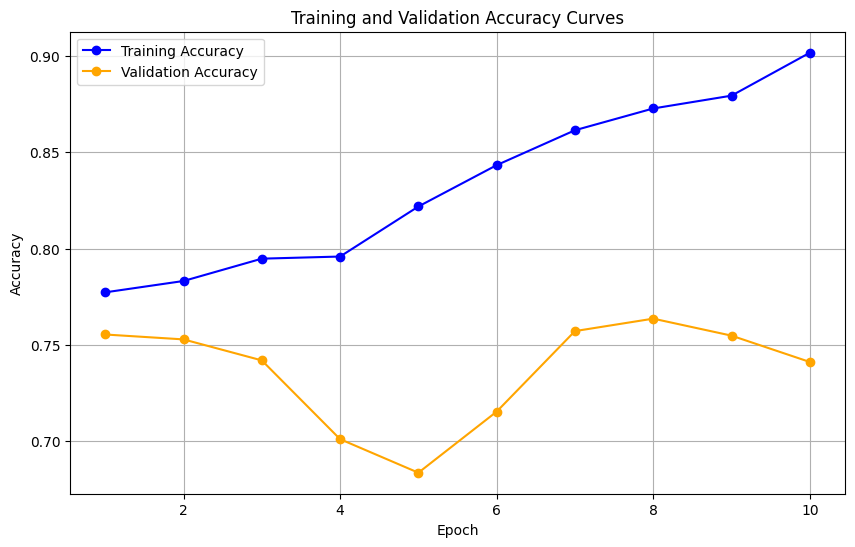

In [15]:
# Plot training and validation loss curves
plt.figure(figsize=(10, 6))
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_accuracy_list, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, val_accuracy_list, label='Validation Accuracy', marker='o', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def find_number_indices(lst, num):
    start_index = None
    end_index = None
    for i, value in enumerate(lst):
        if value == num:
            if start_index is None:
                start_index = i
            end_index = i
    return start_index, end_index

def find_phrase_indices(text, phrase):
    start_index = text.find(phrase)
    end_index = start_index + len(phrase)  # Calculate the end index based on the length of the phrase
    return start_index, end_index

def reconstruct_text_first(tokenized_text):
    reconstructed_text = []
    for token in tokenized_text:
        if token.startswith("##") and reconstructed_text:
            # Append the suffix of the token to the last word in the reconstructed text
            reconstructed_text[-1] += token[2:]
        else:
            # If the token doesn't start with "##" or it's the first token, just append it
            reconstructed_text.append(token)
    return reconstructed_text

def create_label_format(sample_text, labels, words_token):
    unique_elements = list(set(labels.cpu().numpy()))
    output = []
    for l in unique_elements:
        if l!=0:
            start, end = find_number_indices(labels, l)
            if start == end:
                spans = words_token[start]
            else:
                spans = words_token[start: end]

                spans = reconstruct_text_first(spans)

                spans = ' '.join(spans)
            start, end = find_phrase_indices(sample_text, spans)
            lab = id_to_label[l]
            output.append({"start": start, "end": end, "technique": lab, "text": spans})
            sorted_data = sorted(output, key=lambda x: x['start'])
    return output

In [ ]:
import json

with open("araieval24_task1_team_unbeaten.jsonl", "w", encoding="utf-8") as file:
    for data in val_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        # labels = data['labels'].to(device)
        #model.to(device)
        outputs = model(input_ids)
        prediction = outputs.logits.argmax(-1)
        for id, mask, text, words, pred in zip(data["id"], data["attention_mask"], data["text"], data["words"], prediction):
            output_label = create_label_format(text, pred[:sum(mask)], words[:sum(mask)])
            line_json = {"id": id,
                        "labels": output_label}
            line_json_str = json.dumps(line_json, ensure_ascii=False)
            file.write(line_json_str + '\n')  # Add newline character to separate each JSON object
